In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [11]:
#猫狗数据集加载
(train, valid, test), info = tfds.load('cats_vs_dogs',split=['train[:70%]', 'train[70%:90%]', 'train[90%:]'], with_info=True, as_supervised=True)

In [12]:
print(info)   #查看数据集信息

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

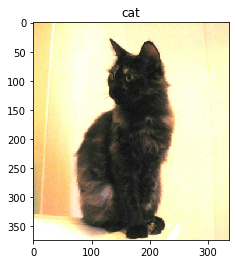

In [13]:
label_name = info.features['label'].int2str   #数字转字符串
for image, label in train.take(1):   #显示1张图片
    plt.figure()
    plt.imshow(image)
    plt.title(label_name(label))

In [14]:
img_size = 128
def preprocessing(image,label):
    image = tf.cast(image,tf.float32)    #将图片转为float32格式
    image = image/255.0   #图片归一化
    image = tf.image.resize(image,(img_size,img_size))   #修改图片尺寸
    return image,label

In [15]:
train = train.map(preprocessing)   #将预处理函数映射到数据中
valid = valid.map(preprocessing)
test = test.map(preprocessing)

In [16]:
batch_size = 32
train_batches = train.batch(batch_size)
valid_batches = valid.batch(batch_size)
test_batches = test.batch(batch_size)

In [132]:
for image,label in train_batches.take(1): 
    print(image.shape)

(32, 128, 128, 3)


In [133]:
#加载MobileNet网络
base_model=tf.keras.applications.MobileNet(input_shape=(128,128,3),include_top=False,weights=None)

In [134]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = tf.keras.layers.Dense(1)

In [135]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer                 
])

In [139]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_12  (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 1025      
Total params: 3,229,889
Trainable params: 3,208,001
Non-trainable params: 21,888
_________________________________________________________________


In [137]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [138]:
model_train = model.fit(train_batches,epochs=10,validation_data=valid_batches)

Epoch 1/10
509/509 [==============================] - 892s 2s/step - loss: 6.8357 - accuracy: 0.5413 - val_loss: 7.5815 - val_accuracy: 0.5085
Epoch 2/10
509/509 [==============================] - 914s 2s/step - loss: 6.9400 - accuracy: 0.5407 - val_loss: 7.1131 - val_accuracy: 0.5235
Epoch 3/10
509/509 [==============================] - 915s 2s/step - loss: 7.1167 - accuracy: 0.5239 - val_loss: 6.9699 - val_accuracy: 0.5448
Epoch 4/10
509/509 [==============================] - 913s 2s/step - loss: 6.8936 - accuracy: 0.5442 - val_loss: 6.3062 - val_accuracy: 0.5826
Epoch 5/10
509/509 [==============================] - 900s 2s/step - loss: 6.7934 - accuracy: 0.5504 - val_loss: 6.4502 - val_accuracy: 0.5452
Epoch 6/10
509/509 [==============================] - 883s 2s/step - loss: 7.2290 - accuracy: 0.5164 - val_loss: 7.4566 - val_accuracy: 0.5059
Epoch 7/10
509/509 [==============================] - 932s 2s/step - loss: 7.4411 - accuracy: 0.5071 - val_loss: 8.2999 - val_accuracy: 0.4522

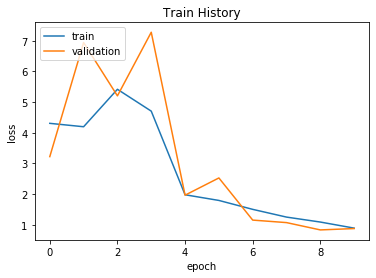

In [20]:
def train_history(model_train,train,val):   #查看训练集和验证集训练时的准确率和损失变化
    plt.plot(model_train.history[train])
    plt.plot(model_train.history[val])
    plt.title('Train History')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')   #图例

train_history(model_train,'loss','val_loss')

In [108]:
scores = model.evaluate(test_batches)

73/73 [==============================] - 6s 74ms/step - loss: 1.1335 - accuracy: 0.5778


In [144]:
#导入MobileNet预训练模型
base_model=tf.keras.applications.MobileNet(input_shape=(128,128,3),include_top=False,weights='imagenet')

In [145]:
base_model.trainable = False   #冻结网络权重

In [153]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = tf.keras.layers.Dense(1)

In [154]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer                 
])

In [155]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_14  (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 1025      
Total params: 3,229,889
Trainable params: 1,025
Non-trainable params: 3,228,864
_________________________________________________________________


In [156]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [157]:
model_train = model.fit(train_batches,epochs=10,validation_data=valid_batches)

Epoch 1/10
509/509 [==============================] - 231s 450ms/step - loss: 3.3550 - accuracy: 0.7302 - val_loss: 0.7991 - val_accuracy: 0.9261
Epoch 2/10
509/509 [==============================] - 230s 452ms/step - loss: 0.6722 - accuracy: 0.9334 - val_loss: 1.1027 - val_accuracy: 0.9063
Epoch 3/10
509/509 [==============================] - 233s 457ms/step - loss: 1.1301 - accuracy: 0.9081 - val_loss: 0.5500 - val_accuracy: 0.9446
Epoch 4/10
509/509 [==============================] - 223s 438ms/step - loss: 0.5598 - accuracy: 0.9482 - val_loss: 0.4641 - val_accuracy: 0.9538
Epoch 5/10
509/509 [==============================] - 219s 430ms/step - loss: 0.4519 - accuracy: 0.9575 - val_loss: 0.5133 - val_accuracy: 0.9542
Epoch 6/10
509/509 [==============================] - 217s 427ms/step - loss: 0.4695 - accuracy: 0.9568 - val_loss: 0.4416 - val_accuracy: 0.9559
Epoch 7/10
509/509 [==============================] - 222s 437ms/step - loss: 0.4409 - accuracy: 0.9616 - val_loss: 0.4737 -

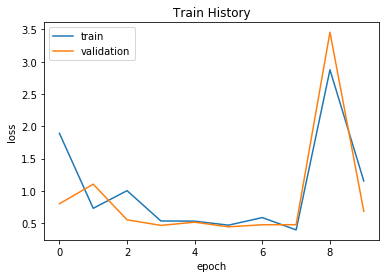

In [158]:
train_history(model_train,'loss','val_loss')

In [159]:
scores = model.evaluate(test_batches)

73/73 [==============================] - 24s 328ms/step - loss: 0.6352 - accuracy: 0.9497


In [2]:
base_model=tf.keras.applications.MobileNet(input_shape=(128,128,3),include_top=False,weights='imagenet')

In [4]:
for layer in base_model.layers[:10]:   #冻结网络权重
    layer.trainble = False

In [5]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

In [7]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer                 
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 3,229,889
Trainable params: 3,208,001
Non-trainable params: 21,888
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model_train = model.fit(train_batches,epochs=10,validation_data=valid_batches)

Epoch 1/10
509/509 [==============================] - 874s 2s/step - loss: 4.4787 - accuracy: 0.6965 - val_loss: 3.2231 - val_accuracy: 0.7859
Epoch 2/10
509/509 [==============================] - 907s 2s/step - loss: 3.6898 - accuracy: 0.7540 - val_loss: 6.9395 - val_accuracy: 0.5412
Epoch 3/10
509/509 [==============================] - 910s 2s/step - loss: 5.2573 - accuracy: 0.6439 - val_loss: 5.2023 - val_accuracy: 0.6555
Epoch 4/10
509/509 [==============================] - 911s 2s/step - loss: 4.9775 - accuracy: 0.6173 - val_loss: 7.2744 - val_accuracy: 0.5192
Epoch 5/10
509/509 [==============================] - 941s 2s/step - loss: 1.8975 - accuracy: 0.6092 - val_loss: 1.9673 - val_accuracy: 0.6209
Epoch 6/10
509/509 [==============================] - 926s 2s/step - loss: 1.7327 - accuracy: 0.6304 - val_loss: 2.5284 - val_accuracy: 0.5972
Epoch 7/10
509/509 [==============================] - 935s 2s/step - loss: 1.6593 - accuracy: 0.6256 - val_loss: 1.1555 - val_accuracy: 0.6731

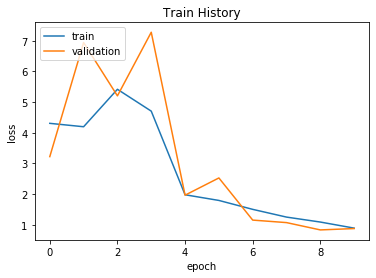

In [21]:
train_history(model_train,'loss','val_loss')

In [19]:
scores = model.evaluate(test_batches)

73/73 [==============================] - 23s 305ms/step - loss: 0.8828 - accuracy: 0.6049
